loaded 1 out of 1 output directories. 


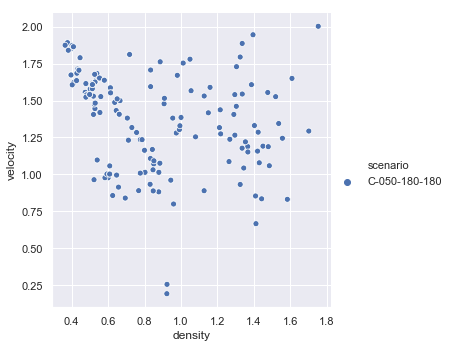

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vadere_analysis_tool import ScenarioOutput, VadereProject
sns.set(style="darkgrid")
#g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)


projectFolder = "./../../../../VadereModelTests/TestOSM_zhang-2011/"
project = VadereProject(projectFolder)

#out = project.named_output.C_050_180_180_2018_11_26_16_30_29_355()

# transform data frame
dataFrames = []
for outStr in project.output_dirs :
    out = project.output_dirs[outStr]
    for fileStr in out.files :
        if fileStr.endswith(".fundamentalDiagram") :
            ndf = pd.DataFrame();
            df = out.files[fileStr]()
            df = df[df.velocity > 0]
            ndf['density'] = df.density.astype(float)
            ndf['velocity'] = df.velocity.astype(float)
            ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
            dataFrames.append(ndf)

concatFrames = pd.concat(dataFrames)

sns.relplot(x="density", y="velocity", hue="scenario", data=concatFrames);            

['test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test']